In [1]:
%matplotlib inline
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In pandas, method chaining can be used to avoid assigning new variables after each modification to the data frame (read more [here](https://tomaugspurger.github.io/method-chaining.html) and [here](http://davidasboth.com/2016/11/30/method-chaining-in-pandas/)). By using `\` or `()`, the method chain syntax can be formatted similarly to the standard `dplyr` function pipe syntax with `%>%`.

In [2]:
iris\
    .loc[:, ['SepalLength', 'PetalWidth', 'Species']]\
    .where(iris['SepalLength'] > 4.6)\
    .assign(PetalWidthx2 = lambda x_iris: x_iris['PetalWidth'] * 2)\
    .groupby('Species')\
    .agg({'SepalLength': 'mean', 'PetalWidthx2': 'std'})

,PetalWidthx2,SepalLength
Species,,
setosa,0.224043,5.119512
versicolor,0.395505,5.936000
virginica,0.549300,6.588000


I think the only somewhat unclear part is the `assign` method, which uses `lambda` to create a variable (which I named `x_iris`) out of the currently modified data frame. If I would have just referenced `iris` without the `lambda`, I would have been referring to the original `iris` data frame, before it was modified by the calls to `.loc` and `.where`.

In practice, I would be inclined to select columns without the `.loc` call and to use a parenthesis instead of the line continuation character `\`. 

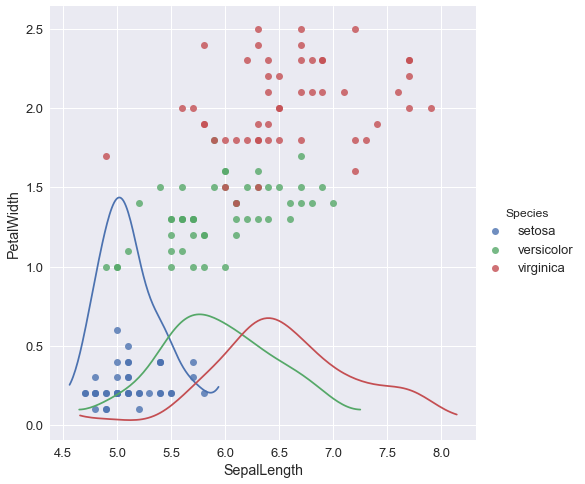

In [3]:
import seaborn as sns
sns.set(font_scale=1.3)

(iris[['SepalLength', 'PetalWidth', 'Species']]
    .where(iris['SepalLength'] > 4.6)
    .pipe(sns.FacetGrid, hue='Species', size=7)
        .map(sns.kdeplot, 'SepalLength', cut=1)
        .map(sns.regplot, 'SepalLength', 'PetalWidth', fit_reg=False)
        .add_legend())

There is also a library called `ggplot` in Python, which mimics the syntax of `ggplot2` from R. However, it is not 1 to 1 compatible, which I found quite confusing for anything beyond the most basic plots, especially when trying to use it side by side with R.